In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

#Read Data

In [4]:
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


#Plot Your Data

<Axes: xlabel='DATE'>

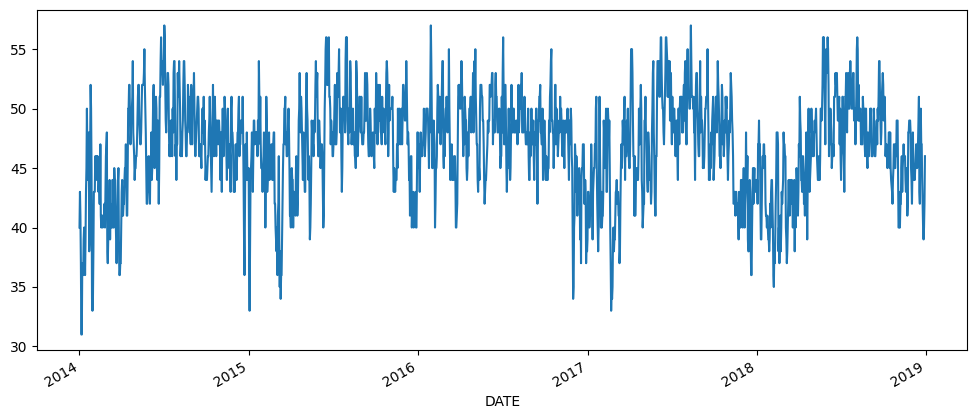

In [5]:
df['AvgTemp'].plot(figsize=(12,5))

#Check For Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [7]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['AvgTemp'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.393
Date:                Fri, 18 Sep 2020   AIC                           8294.785
Time:                        04:22:38   BIC                           8338.842
Sample:                             0   HQIC                          8311.039
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2330      0.370      3.331      0.001       0.508       1.958
ar.L1          0.9735      0.008    122.152      0.000       0.958       0.989
ma.L1         -0.1221      0.024     -5.137      0.000      -0.169      -0.076
ma.L2         -0.2201      0.024     -9.113      0.000      -0.267      -0.173
ma.L3         -0.2022      0.024     -8.446      0.000      -0.249      -0.155
ma.L4         -0.1371      0.023     -6.016      0.000      -0.182      -0.092
ma.L5         -0.0506      0.024     -2.072      0.038      -0.098      -0.003
sigma2         5.5035      0.172     31.914      0.000       5.165       5.841
===================================================================================
Ljung-Box (Q):                       35.25   Jarque-Bera (JB):                20.53
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


## Train the Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                     ARMA(1, 5)   Log Likelihood               -4138.130
Method:                       css-mle   S.D. of innovations              2.347
Date:                Fri, 18 Sep 2020   AIC                           8292.261
Time:                        04:23:48   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.787     59.148      0.000      44.988      48.071
ar.L1.AvgTemp     0.9860      0.006    155.004      0.000       0.974       0.998
ma.L1.AvgTemp    -0.1403      0.024     -5.754      0.000      -0.188      -0.092
ma.L2.AvgTemp    -0.2328      0.024     -9.641      0.000      -0.280      -0.185
ma.L3.AvgTemp    -0.2163      0.025     -8.502      0.000      -0.266      -0.166
ma.L4.AvgTemp    -0.1478      0.023     -6.352      0.000      -0.193      -0.102
ma.L5.AvgTemp    -0.0587      0.024     -2.413      0.016      -0.106      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0142           +0.0000j            1.0142            0.0000
MA.1            1.0867           -0.0000j            1.0867           -0.0000
MA.2            0.0537           -1.8503j            1.8511           -0.2454
MA.3            0.0537           +1.8503j            1.8511            0.2454
MA.4           -1.8566           -1.0630j            2.1394           -0.4172
MA.5           -1.8566           +1.0630j            2.1394            0.4172
-----------------------------------------------------------------------------
"""

#Make Predictions on Test Set

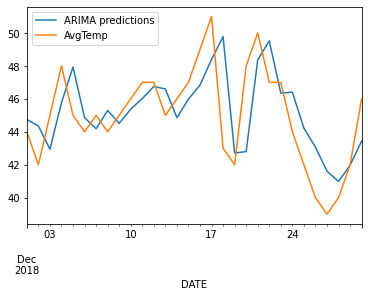

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)


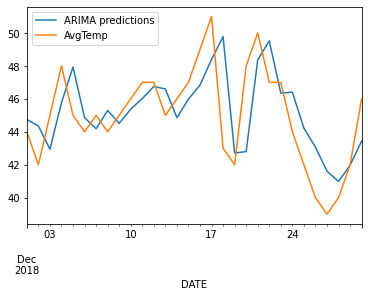

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [ ]:
test['AvgTemp'].mean()

45.0

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)


2.326343714317439


In [ ]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


#For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418064
2018-12-31    46.113783
2019-01-01    45.617772
2019-01-02    45.249555
2019-01-03    45.116984
2019-01-04    45.136771
2019-01-05    45.156280
2019-01-06    45.175516
2019-01-07    45.194482
2019-01-08    45.213183
2019-01-09    45.231622
2019-01-10    45.249802
2019-01-11    45.267728
2019-01-12    45.285403
2019-01-13    45.302830
2019-01-14    45.320012
2019-01-15    45.336955
2019-01-16    45.353659
2019-01-17    45.370130
2019-01-18    45.386370
2019-01-19    45.402383
2019-01-20    45.418171
2019-01-21    45.433738
2019-01-22    45.449087
2019-01-23    45.464221
2019-01-24    45.479143
2019-01-25    45.493855
2019-01-26    45.508362
2019-01-27    45.522665
2019-01-28    45.536769
2019-01-29    45.550674
Freq: D, Name: ARIMA Predictions, dtype: float64


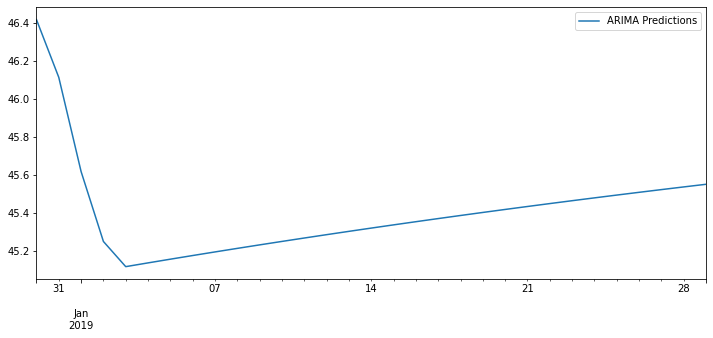

In [ ]:
pred.plot(figsize=(12,5),legend=True)
